<p align="center">
  <img src="./task.jpg" width=720px>
</p>

# Работа 1

В этой работе мы хотим исследовать, как выбор формулы численного дифференцирования влияет на абсолютную погрешность вычисления производной, а также увидеть на практике поведение ошибок при уменьшении шага.

Рассматривали следующие функции:
$$
\sin(x^2), \quad \cos(\sin x), \quad \exp(\sin(\cos x)), \quad \ln(x+3), \quad (x+3)^{1/2}.
$$

Производная функции вычислялась численно при различных шагах $ h $, после чего результат сравнивался с аналитически известной производной.

Для каждой функции строились графики зависимости абсолютной погрешности $ \varepsilon(h) $ от шага $ h $ в логарифмическом масштабе.

---

Численное дифференцирование использют в задачах, где аналитическая производная либо неизвестна, либо неудобна для вычисления. Однако такие методы всегда дают приближённый результат, и мы хотим понимать, как он себя ведет.

Интуитивно кажется, что чем меньше шаг $ h $, тем точнее результат.

На практике окажется, что это не всегда так: при слишком малых $ h $ начинают сильно влиять ошибки округления. Поэтому, как будет видно далее, возникнет некий оптимум между погрешностью аппроксимации и вычислительными ошибками.

In [960]:
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from typing import Callable

In [961]:
# def get_h(n: int) -> float: return 2 / 2**n

# h = [get_h(n) for n in range(1, 22)]
# h = [h for h in np.linspace(2/2**22, 1/2, 1000)]
h = 2 ** np.linspace(-20, 0, 1000)

log_h = [np.log2(h) for h in h]

In [962]:
def df_errors_dep_on_h(calc_method: Callable[[Callable[[float], float], float, float], float],
                       function:    Callable[[float], float],
                       derivative:  Callable[[float], float],
                       h: float, x=0) -> list[float]:

  method = [calc_method(function, x, h) for h in h] 
  real   = [derivative(x) for h in h]

  return [abs(m - r) for m, r in zip(method, real)]

In [963]:
method_1 = lambda func, x, h: (func(x + h) - func(x)) / h
method_2 = lambda func, x, h: (func(x) - func(x - h)) / h
method_3 = lambda func, x, h: (func(x + h) - func(x - h)) / (2 * h)
method_4 = lambda func, x, h: 4/3 * (func(x + h) - func(x - h)) / (2 * h) - 1/3 * (func(x + 2*h) - func(x - 2*h)) / (4 * h)
method_5 = lambda func, x, h: 3/2 * (func(x + h) - func(x - h)) / (2 * h) - 3/5 * (func(x + 2*h) - func(x - 2*h)) / (4 * h) + 1/10 * (func(x + 3*h) - func(x - 3*h)) / (6 * h)

In [964]:
function_1   = lambda x: np.sin(x**2)
derivative_1 = lambda x: np.cos(x**2) * 2 * x

function_2   = lambda x: np.cos(np.sin(x))
derivative_2 = lambda x: -np.sin(np.sin(x)) * np.cos(x)

function_3   = lambda x: np.exp(np.sin(np.cos(x)))
derivative_3 = lambda x: np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * -np.sin(x)

function_4   = lambda x: np.log(x + 3)
derivative_4 = lambda x: 1 / (x + 3)

function_5   = lambda x: (x + 3)**0.5
derivative_5 = lambda x: 1 / (2 * (x + 3)**0.5)

## 1. $f(x) = ~sin(x^2)$

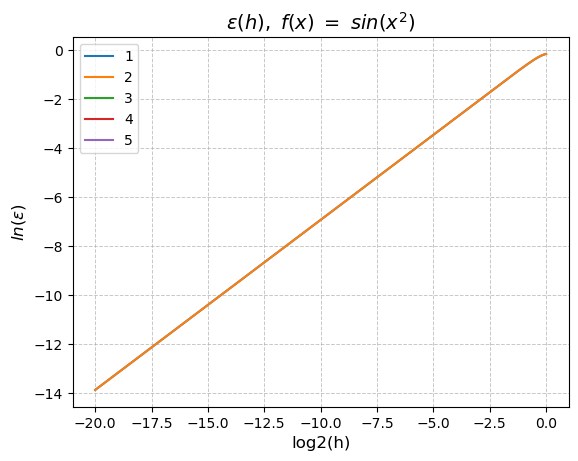

In [965]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_1 = df_errors_dep_on_h(method_1, function_1, derivative_1, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "1")
errors_1 = df_errors_dep_on_h(method_2, function_1, derivative_1, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "2")
errors_1 = df_errors_dep_on_h(method_3, function_1, derivative_1, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "3")
errors_1 = df_errors_dep_on_h(method_4, function_1, derivative_1, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "4")
errors_1 = df_errors_dep_on_h(method_5, function_1, derivative_1, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "5")

plt.title(r"$\varepsilon(h), ~f(x) ~= ~sin(x^2)$", fontsize=14)
plt.legend()

## 2. $f(x) = ~cos(sin(x))$

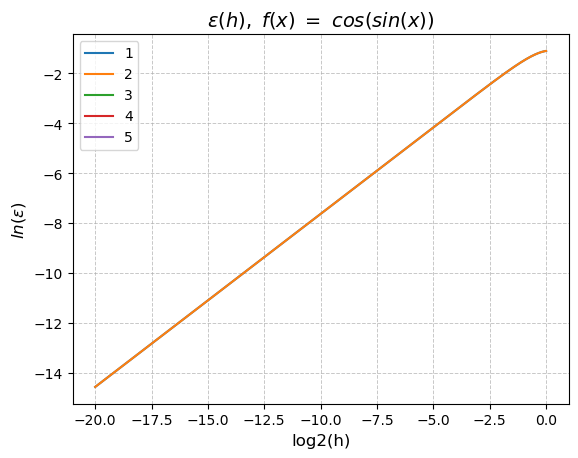

In [966]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_1 = df_errors_dep_on_h(method_1, function_2, derivative_2, h)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "1")
errors_2 = df_errors_dep_on_h(method_2, function_2, derivative_2, h)
plt.plot(log_h, [np.log(e) for e in errors_2], label = "2")
errors_3 = df_errors_dep_on_h(method_3, function_2, derivative_2, h)
plt.plot(log_h, [np.log(e) for e in errors_3], label = "3")
errors_4 = df_errors_dep_on_h(method_4, function_2, derivative_2, h)
plt.plot(log_h, [np.log(e) for e in errors_4], label = "4")
errors_5 = df_errors_dep_on_h(method_5, function_2, derivative_2, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "5")

plt.title(r"$\varepsilon(h), ~f(x) ~= ~cos(sin(x))$", fontsize=14)
plt.legend()

## 3. $f(x) ~= ~exp(sin(cos(x)))$

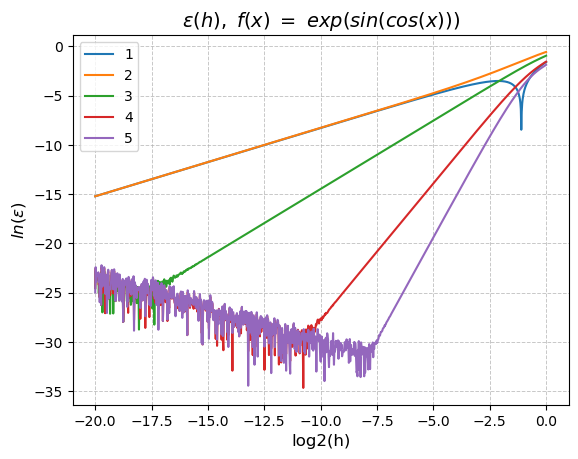

In [967]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_1 = df_errors_dep_on_h(method_1, function_3, derivative_3, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "1")
errors_3 = df_errors_dep_on_h(method_2, function_3, derivative_3, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_3], label = "2")
errors_3 = df_errors_dep_on_h(method_3, function_3, derivative_3, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_3], label = "3")
errors_3 = df_errors_dep_on_h(method_4, function_3, derivative_3, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_3], label = "4")
errors_3 = df_errors_dep_on_h(method_5, function_3, derivative_3, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_3], label = "5")

plt.title(r"$\varepsilon(h), ~f(x) ~= ~exp(sin(cos(x)))$", fontsize=14)
plt.legend()

## 4. $f(x) = ln(x+3)$

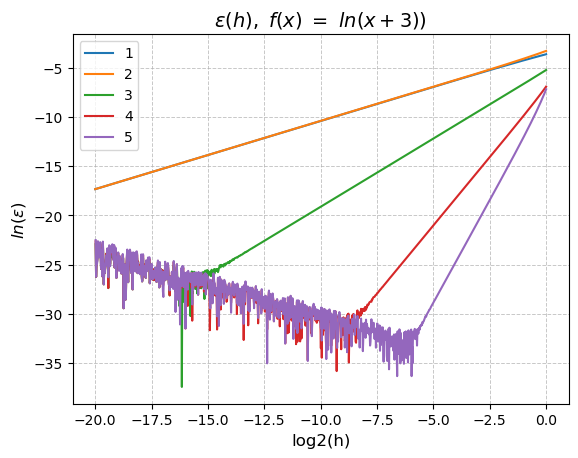

In [968]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_1 = df_errors_dep_on_h(method_1, function_4, derivative_4, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "1")
errors_1 = df_errors_dep_on_h(method_2, function_4, derivative_4, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "2")
errors_1 = df_errors_dep_on_h(method_3, function_4, derivative_4, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "3")
errors_1 = df_errors_dep_on_h(method_4, function_4, derivative_4, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "4")
errors_1 = df_errors_dep_on_h(method_5, function_4, derivative_4, h, x = 1)
plt.plot(log_h, [np.log(e) for e in errors_1], label = "5")

plt.title(r"$\varepsilon(h), ~f(x) ~= ~ln(x+3))$", fontsize=14)
plt.legend()

## Метод 5

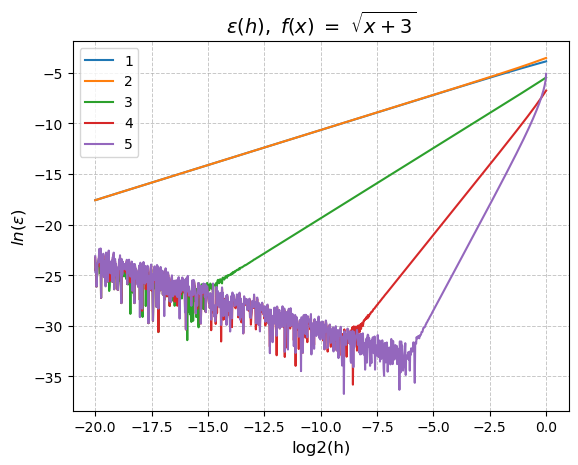

In [969]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_5 = df_errors_dep_on_h(method_1, function_5, derivative_5, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "1")
errors_5 = df_errors_dep_on_h(method_2, function_5, derivative_5, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "2")
errors_5 = df_errors_dep_on_h(method_3, function_5, derivative_5, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "3")
errors_5 = df_errors_dep_on_h(method_4, function_5, derivative_5, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "4")
errors_5 = df_errors_dep_on_h(method_5, function_5, derivative_5, h)
plt.plot(log_h, [np.log(e) for e in errors_5], label = "5")

plt.title(r"$\varepsilon(h), ~f(x) ~= ~\sqrt{x+3}$", fontsize=14)
plt.legend()

---


## Результаты

По графикам видно, что методы 1 и 2 дают наибольшую погрешность, причем с точки зрения точности - почти не различимы.

Метод 3 заметно точнее, а методы 4 и 5 показывают резкое уменьшение ошибки при достаточно высоких значениях шага $ h $.

При очень малых $ h $ у последних методов наблюдается рост ошибки.

Точнее всех на участке, где играет роль погрешность метода, оказывается метод 5.

Нельзя не заметить что для первых двух функций все графики не отличаются вообще.

---

## Анализ

При уменьшении шага $ h $ сначала доминирует ошибка аппроксимации, и погрешность убывает

Однако при слишком малых значениях шага начинают преобладать ошибки округления, связанные с точностью представления чисел в компьютере, из-за чего ошибка перестаёт уменьшаться и возрастает.

Особенно хорошо этот эффект заметен для функций $ \exp(\sin(\cos x)) $, $ \ln(x+3) $ и $ \sqrt{x+3} $, где последние методы дают наилучший результат только в ограниченном диапазоне значений $ h $.

Для некоторых функций методы давали практически одинаковые значения для любых шагов. Это можно связать с природой этих методов. Они все так или иначе берутся из разложений функции в ряд тейлора - мы разными способами получаем f'(x) из разложения, и получаем разные O(), но если функция достаточно точно аппроксимируется первыми членами в окрестности заданной точки, понятно что это O() будет ничтожно мало.

В результате можно сделать вывод, что при численном дифференцировании важно не только выбирать метод с высоким порядком точности, но и подбирать оптимальный шаг, обеспечивающий минимальную погрешность. Для некоторых функций выбор метода не важен изза их вида.
